<a href="https://colab.research.google.com/github/BigWillieStyle/Python-Projects/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F



In [48]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
      super().__init__()
      self.fc1 = nn.Linear(in_features, h1)
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x

In [49]:
torch.manual_seed(42)
model = Model()

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [52]:
my_df['species'] = my_df['species'].map({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})


In [53]:
x = my_df.drop('species', axis=1).values
y = my_df['species'].values

In [54]:
from sklearn.model_selection import train_test_split


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [58]:
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'epoch: {i} loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 1.1973121166229248
epoch: 10 loss: 1.0163519382476807
epoch: 20 loss: 0.895247757434845
epoch: 30 loss: 0.7789366841316223
epoch: 40 loss: 0.6230968236923218
epoch: 50 loss: 0.3830468952655792
epoch: 60 loss: 0.21116439998149872
epoch: 70 loss: 0.1203203946352005
epoch: 80 loss: 0.08342476189136505
epoch: 90 loss: 0.07000991702079773


Text(0.5, 0, 'Epoch')

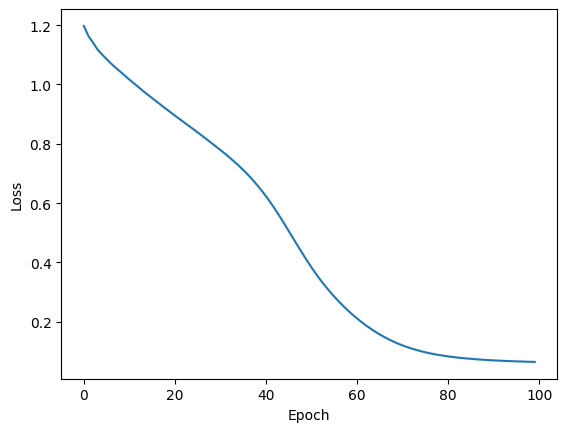

In [59]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')